# **Exercise 1**

Load the image of a dog using the following commands:

```python
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 8]
A = imread(os.path.join('.', 'dog.jpg'))
X = np.mean(A, -1)  # Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()
```

---

### **Tasks**

1. **Compute the economy SVD** of the matrix $ X $.

2. Let $ X $ be the matrix representing the true image and $ \tilde{X} $ the approximation of rank $ r $ obtained using the SVD. Compute and plot the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank $ r $. The expression for the relative reconstruction error is:

$$
\frac{\| X - \tilde{X} \|_F}{\| X \|_F},
$$

where the Frobenius norm is defined as:

$$
\| X \|_F = \sqrt{\sum_{i=1}^n \sum_{j=1}^m |X_{ij}|^2}.
$$

3. **Square the relative reconstruction error** and plot it to compute the fraction of the missing variance as a function of $ r $.

4. **Find the rank $ r_v $** where the reconstruction captures 99% of the total variance.

5. Compare $ r_v $ with:
   - The rank $ r_F $, where the reconstruction captures 99% in the Frobenius norm.
   - The rank $ r_c $, where the reconstruction captures 99% of the cumulative sum of singular values.


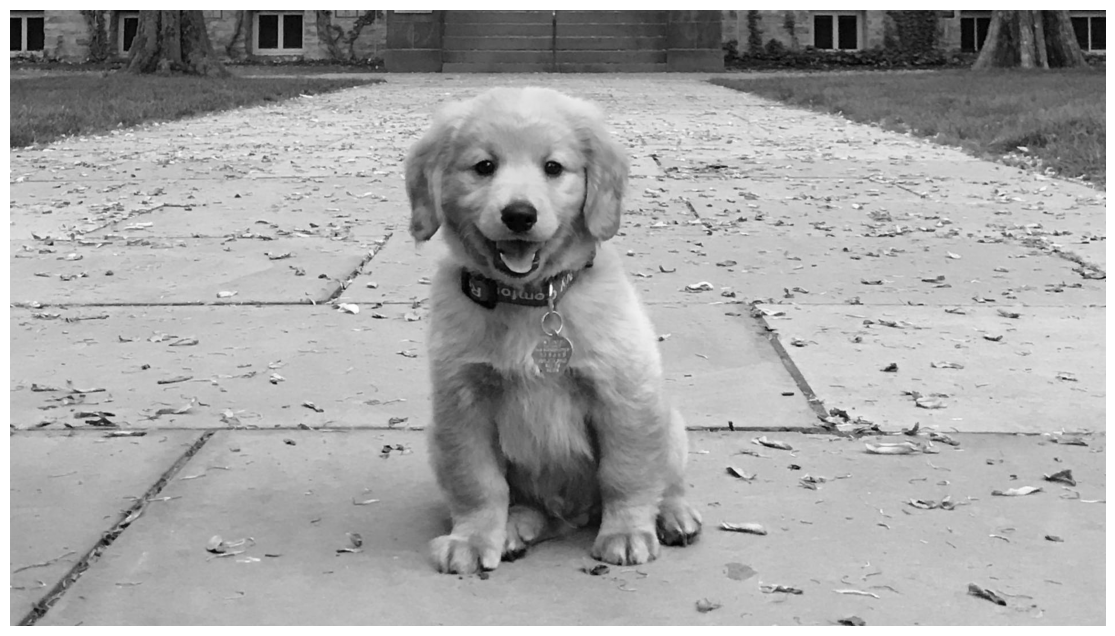

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 8]
A = imread(os.path.join('.', 'dog.jpg'))
X = np.mean(A, -1)  # Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

1. **Compute the economy SVD** of the matrix $ X $.

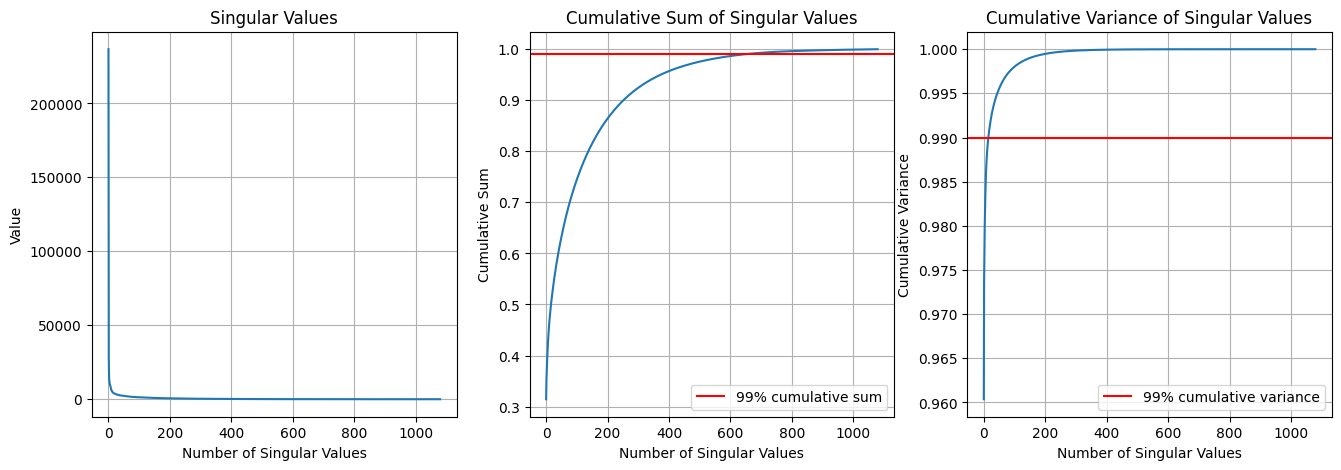

In [2]:
U, s, Vt = np.linalg.svd(X, full_matrices=False) # Compute the SVD, full_matrices=False is the economy version

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
# plot the singular values
ax[0].plot(s)
ax[0].set_title('Singular Values')
ax[0].set_xlabel('Number of Singular Values')
ax[0].set_ylabel('Value')
ax[0].grid(True)

# plot the cumulative sum of the singular values
ax[1].plot(np.cumsum(s) / np.sum(s))
ax[1].set_title('Cumulative Sum of Singular Values')
ax[1].set_ylabel('Cumulative Sum')
ax[1].set_xlabel('Number of Singular Values')
ax[1].grid(True)
# line at 99%
ax[1].axhline(y=0.99, color='r', linestyle='-', label = '99% cumulative sum')
ax[1].legend()

# plot the cumultative variance of the singular values
ax[2].plot(np.cumsum(s**2) / np.sum(s**2))
ax[2].set_title('Cumulative Variance of Singular Values')
ax[2].set_ylabel('Cumulative Variance')
ax[2].set_xlabel('Number of Singular Values')
ax[2].grid(True)
# line at 99%
ax[2].axhline(y=0.99, color='r', linestyle='-', label = '99% cumulative variance')
ax[2].legend()

plt.show()

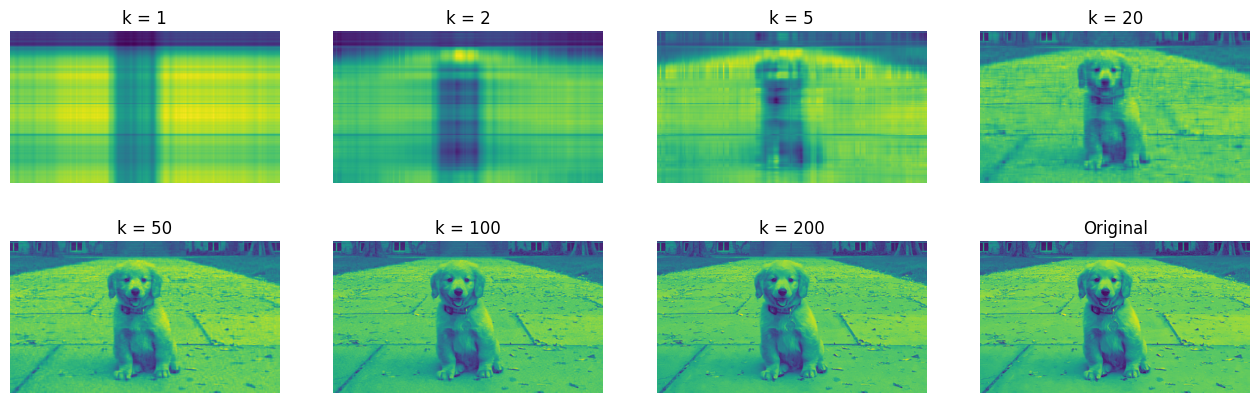

In [3]:
# For some ks plot the approximations
ks = [1, 2, 5, 20, 50, 100, 200]

fig, ax = plt.subplots(2, 4, figsize=(16, 5))
ax = ax.ravel()
for i, k in enumerate(ks):
	Xapprox = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
	ax[i].imshow(Xapprox)
	ax[i].set_title('k = %d' % k)
	ax[i].axis('off')

ax[-1].imshow(X)
ax[-1].set_title('Original')
ax[-1].axis('off')
plt.show()

2. Let $ X $ be the matrix representing the true image and $ \tilde{X} $ the approximation of rank $ r $ obtained using the SVD. Compute and plot the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank $ r $. The expression for the relative reconstruction error is:

$$
\frac{\| X - \tilde{X} \|_F}{\| X \|_F},
$$

where the Frobenius norm is defined as:

$$
\| X \|_F = \sqrt{\sum_{i=1}^n \sum_{j=1}^m |X_{ij}|^2}.
$$

  0%|          | 0/1079 [00:00<?, ?it/s]

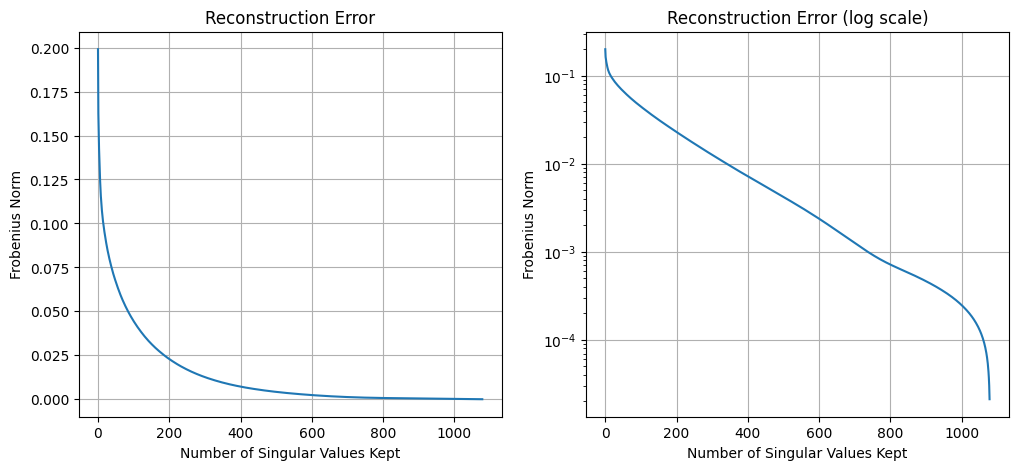

In [4]:
from tqdm.notebook import tqdm

U, s, Vt = np.linalg.svd(X, full_matrices=False) # Compute the SVD, full_matrices=False is the economy version

reconstruction_errors_fro = []
max_k = len(s)
for k in tqdm(range(1, max_k)):
	Xapprox = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
	reconstruction_errors_fro.append(np.linalg.norm(X - Xapprox, 'fro')/np.linalg.norm(X, 'fro'))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(reconstruction_errors_fro)
ax[0].set_title('Reconstruction Error')
ax[0].set_ylabel('Frobenius Norm')
ax[0].set_xlabel('Number of Singular Values Kept')
ax[0].grid(True)

ax[1].semilogy(reconstruction_errors_fro)
ax[1].set_title('Reconstruction Error (log scale)')
ax[1].set_ylabel('Frobenius Norm')
ax[1].set_xlabel('Number of Singular Values Kept')
ax[1].grid(True)
plt.show()



3. **Square the relative reconstruction error** and plot it to compute the fraction of the missing variance as a function of $ r $.



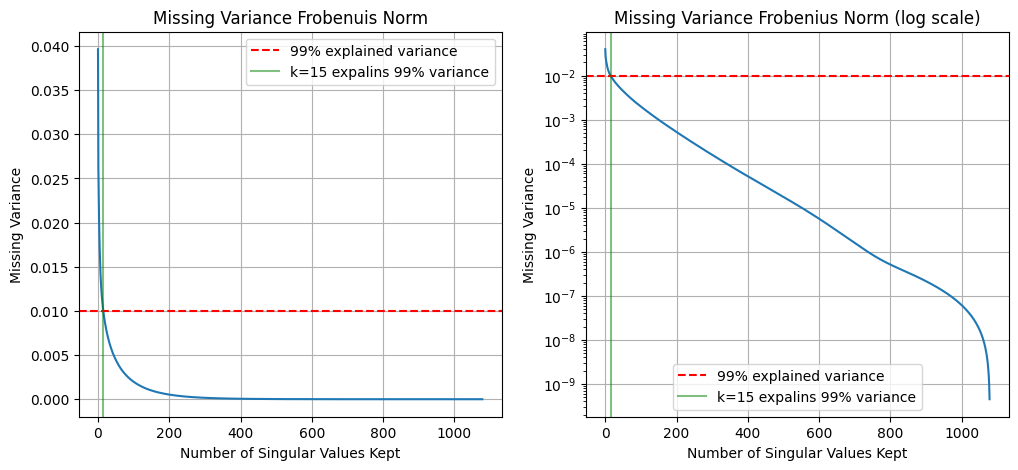

In [5]:
missing_variances_fro = []
for reconstruction_error in reconstruction_errors_fro:
	missing_variances_fro.append(reconstruction_error**2)

r_v = np.argmax(np.array(missing_variances_fro) < 0.01)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(missing_variances_fro)
ax[0].set_title('Missing Variance Frobenuis Norm')
ax[0].set_ylabel('Missing Variance')
ax[0].set_xlabel('Number of Singular Values Kept')
ax[0].axhline(y=0.01, color='r', linestyle='--', label = '99% explained variance')
ax[0].axvline(x=r_v, color='g', linestyle='-', label = f'k={r_v} expalins 99% variance', alpha=0.5)
ax[0].legend()
ax[0].grid(True)

ax[1].semilogy(missing_variances_fro)
ax[1].set_title('Missing Variance Frobenius Norm (log scale)')
ax[1].set_ylabel('Missing Variance')
ax[1].set_xlabel('Number of Singular Values Kept')
ax[1].axhline(y=0.01, color='r', linestyle='--', label = '99% explained variance')
ax[1].axvline(x=r_v, color='g', linestyle='-', label = f'k={r_v} expalins 99% variance', alpha=0.5)
ax[1].legend()
ax[1].grid(True)
plt.show()


4. **Find the rank $ r_v $** where the reconstruction captures 99% of the total variance.


In [6]:
print(f'k={r_v} explains 99% of the variance')


k=15 explains 99% of the variance


5. Compare $ r_v $ with:
   - The rank $ r_F $, where the reconstruction captures 99% in the Frobenius norm.
   - The rank $ r_c $, where the reconstruction captures 99% of the cumulative sum of singular values.

In [7]:
r_F = np.argmax(np.array(reconstruction_errors_fro) < 0.01)
r_c = np.argmax(np.cumsum(s) / np.sum(s) > 0.99)
r_ssum = np.argmax(np.cumsum(s**2) / np.sum(s**2) > 0.99)

print(f'k={r_v} explains 99% of the variance')
print(f'k={r_F} explains 99% of the reconstruction error using Frobenius Norm')
print(f'k={r_c} explains 99% of the cumulative Sum of Singular Values')

assert np.allclose((np.cumsum(s**2) / np.sum(s**2))[:-1], np.ones(len(np.cumsum(s**2) / np.sum(s**2))-1) - missing_variances_fro, atol=1e-16)
print('Note: \n  The sum of the squared frobenius norm is in fact the same as the missing explained variance calculated from the singular values')

k=15 explains 99% of the variance
k=341 explains 99% of the reconstruction error using Frobenius Norm
k=645 explains 99% of the cumulative Sum of Singular Values
Note: 
  The sum of the squared frobenius norm is in fact the same as the missing explained variance calculated from the singular values



---

# **Exercise 2**

Consider the function:

$$
f(x, y) = 100(y - x^2)^2 + (1 - x)^2. \tag{2}
$$

### **Tasks**

1. Compute the gradient $ \nabla f $ and the Hessian $ D^2 f $ of $ f(x, y) $ in Equation (2). Prove that the function has a unique minimizer $ x^* $, and find the minimizer.

2. Implement the **Gradient Descent algorithm** with a constant step size to approximate the minimizer. The code must take the following parameters as input:

   - `max_iter = 50000`: Maximum number of iterations,
   - `tol = 1e-8`: Tolerance for the stopping criterion,
   - `x_0 = np.array([-1.2, 1.2])`: Initial guess,
   - `stepsize = 0.001`: Constant step size,
   - `func`: The expression of the function to be minimized (see Equation (2)),
   - `dfunc`: The gradient of the function to be minimized (gradient of Equation (2)).

   Use the following expression for the stopping criterion:

   $$
   \epsilon^{(k)} = \left| f(x^{(k)}, y^{(k)}) - f(x^{(k-1)}, y^{(k-1)}) \right|. \tag{3}
   $$

3. Consider the following matrix:

$$
H = 
\begin{bmatrix}
802 & -400 \\
-400 & 200
\end{bmatrix}. \tag{4}
$$

   - Compute the eigenvalues of $ H $ and decide if it is positive definite or not. 
   - Towards the end of the algorithm (when you are close to the minimum), replace the descent direction $ d = -\nabla f(x) $ with $ d = -H^{-1} \nabla f(x) $. 
   - Is this still a descent direction? 
   - What behavior do you observe? Can you explain this behavior?

   **Hint:** To check if you are close to the minimum, introduce a second tolerance to be used either on the value of $ \epsilon^{(k)} $ or on the value of $ f(x^{(k)}, y^{(k)}) $.


1. Compute the gradient $ \nabla f $ and the Hessian $ D^2 f $ of $ f(x, y) $ in Equation (2). Prove that the function has a unique minimizer $ x^* $, and find the minimizer.


In [8]:
def f(x,y):
	return 100*(y - x**2)**2 + (1 - x)**2



In [9]:
import sympy as sp

x_sym, y_sym = sp.symbols('x y')
f_sym = 100*(y_sym - x_sym**2)**2 + (1 - x_sym)**2

f_grad = [f_sym.diff(x_sym), f_sym.diff(y_sym)]
f_hess = [[f_sym.diff(x_sym, x_sym), f_sym.diff(x_sym, y_sym)], [f_sym.diff(y_sym, x_sym), f_sym.diff(y_sym, y_sym)]]


print(f"Gradient: [{f_grad[0]}, {f_grad[1]}]")
print(f"Hessian: \n  [[{f_hess[0][0]},   {f_hess[0][1]}]\n   [{f_hess[1][0]}                  ,     {f_hess[1][1]}]]")


Gradient: [-400*x*(-x**2 + y) + 2*x - 2, -200*x**2 + 200*y]
Hessian: 
  [[2*(600*x**2 - 200*y + 1),   -400*x]
   [-400*x                  ,     200]]


In [10]:
# Prove that the function has unique minimizer and find it

critical_points = sp.solve(f_grad, (x_sym, y_sym))

for cp in critical_points:
	print(f'Critical Point: {cp}')
	hess_cp = [[f_hess[0][0].subs({x_sym: cp[0], y_sym: cp[1]}), f_hess[0][1].subs({x_sym: cp[0], y_sym: cp[1]})], 
			   [f_hess[1][0].subs({x_sym: cp[0], y_sym: cp[1]}), f_hess[1][1].subs({x_sym: cp[0], y_sym: cp[1]})]]
	print(f'Hessian at Critical Point: \n  {hess_cp}')
	
	eigenvalues = np.linalg.eigvals([[np.float32(hess_cp[0][0]), np.float32(hess_cp[0][1])], [np.float32(hess_cp[1][0]), np.float32(hess_cp[1][1])]])
	print(f'eigenvalues of Hessian at Critical Point: {eigenvalues}')
	
	pos_sum = np.sum(eigenvalues > 0)
	if pos_sum == len(eigenvalues):
		print('The Hessian is positive definite, so we hava a MINIMUM')
	elif pos_sum == 0:
		print('The Hessian is negative definite, so we have a MAXIMUM')
	else:
		print('The Hessian is indefinite, so we have a SADDLE POINT')
	print('\n\n')


Critical Point: (1, 1)
Hessian at Critical Point: 
  [[802, -400], [-400, 200]]
eigenvalues of Hessian at Critical Point: [1.00160065e+03 3.99360776e-01]
The Hessian is positive definite, so we hava a MINIMUM





#### Notes:
- given that we have a single minimizer, than it is a global minimizer.
- we could have calculated the same knowing that the function is the sum of two squared terms, and that the minimum of a squared term is 0. So the function is minimized when both terms are zeroed:
  - $100(y - x^2)^2 = 0 \Rightarrow y = x^2$
  - $(1 - x)^2 = 0 \Rightarrow x = 1$
  - $y = 1$


2. Implement the **Gradient Descent algorithm** with constant step size to approximate the minimizer. The code must take the following parameters as input:

   - `max_iter = 50000`: maximum number of iterations,
   - `tol = 1e-8`: tolerance for the stopping criterion,
   - `x_0 = np.array([-1.2, 1.2])`: initial guess,
   - `stepsize = 0.001`: constant step size,
   - `func`: the expression of the function to be minimized (see Equation (2)),
   - `dfunc`: the gradient of the function to be minimized (gradient of Equation (2)).


In [11]:
import jax
import jax.numpy as jnp

def GD(f, grad_f, x_0, lr, tol, n_epochs, seed=0):
	np.random.seed(seed)
	xs = [x_0]
	losses = [f(x_0)]

	for epoch in tqdm(range(n_epochs)):
		x = xs[-1]
		grad = grad_f(x)
		x = x - lr * grad
		xs.append(x)
		losses.append(f(x))
		if np.abs(losses[-1] - losses[-2]) < tol:
			print(f'Converged after {epoch} epochs')
			break
	return np.array(xs), np.array(losses)

def f(X):
	return 100*(X[1] - X[0]**2)**2 + (1 - X[0])**2

max_iter = 50000 # maximum number of iterations
tol = 1e-8 # tolerance for the stopping criterium
x_0 = np.array([-1.2,1.2]) # initial guess
stepsize = 0.001 # constant stepsize

func = jax.jit(f) # the expression of the function to be minimized
dfunc = jax.grad(func) # the gradient of the function

x, losses = GD(func, dfunc, x_0, stepsize, tol, max_iter)


  0%|          | 0/50000 [00:00<?, ?it/s]

Converged after 12017 epochs


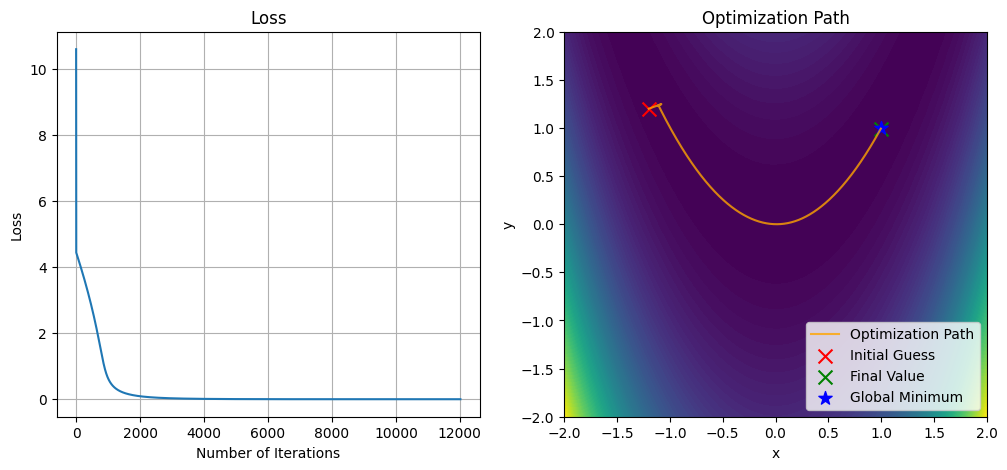

In [12]:
# Plot the convergence of the loss and of the parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(losses)
ax[0].set_title('Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of Iterations')
ax[0].grid(True)

ax[1].plot(x[:, 0], x[:, 1], '-', alpha=0.8, c='orange', label='Optimization Path')
X = np.linspace(-2, 2, 50)
Y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
ax[1].contourf(X, Y, Z, levels=100)
ax[1].scatter(x_0[0], x_0[1], color='r', label='Initial Guess', s=100, marker='x')
ax[1].scatter(x[-1, 0], x[-1, 1], color='g', label='Final Value', s=100, marker='x')
ax[1].scatter(1, 1, color='b', label='Global Minimum', s=100, marker='*')
ax[1].set_title('Optimization Path')
ax[1].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].legend(loc='lower right')
plt.show()


3. Consider the following matrix:

$$
H = 
\begin{bmatrix}
802 & -400 \\
-400 & 200
\end{bmatrix}. \tag{4}
$$

   - Compute the eigenvalues of $ H $ and decide if it is positive definite or not. 
   - Towards the end of the algorithm (when you are close to the minimum), replace the descent direction $ d = -\nabla f(x) $ with $ d = -H^{-1} \nabla f(x) $. 
   - Is this still a descent direction? 
   - What behavior do you observe? Can you explain this behavior?

   **Hint:** To check if you are close to the minimum, introduce a second tolerance to be used either on the value of $ \epsilon^{(k)} $ or on the value of $ f(x^{(k)}, y^{(k)}) $.


In [13]:
H = np.array([[802, -400], [-400, 200]])
eigenvalues = np.linalg.eigvals(H)
print(f'Eigenvalues of Hessian: {eigenvalues}')
pos_sum = np.sum(eigenvalues > 0)
assert pos_sum == len(eigenvalues), 'The Hessian is not positive definite'
print('The Hessian is positive definite')	

Eigenvalues of Hessian: [1.00160064e+03 3.99360767e-01]
The Hessian is positive definite


In [14]:
def GD_Newton(f, grad_f, x_0, lr, tol1, tol2, H, n_epochs, seed=0):
	np.random.seed(seed)
	xs = [x_0]
	losses = [f(x_0)]
	switch_point = 0
	H_inv = np.linalg.inv(H)
	for epoch in tqdm(range(n_epochs)):
		x = xs[-1]
		if len(losses)<2 or np.abs(losses[-1] - losses[-2]) > tol1:
			grad = grad_f(x)
			x = x - lr * grad

		else:
			if switch_point == 0:
				switch_point = epoch
			x = x - lr * H_inv @ grad_f(x)
		xs.append(x)
		losses.append(f(x))
		if np.abs(losses[-1] - losses[-2]) < tol2:
			print(f'Converged after {epoch} epochs')
			break
	return np.array(xs), np.array(losses), switch_point


max_iter = 50000 # maximum number of iterations
tol1 = 1e-5 # tolerance for the swithcing criterium
tol2 = 1e-8 # tolerance for the stopping criterium
x_0 = np.array([-1.2,1.2]) # initial guess
stepsize = 0.001 # constant stepsize

func = jax.jit(f) # the expression of the function to be minimized
dfunc = jax.grad(func) # the gradient of the function

x, losses, switch_epoch = GD_Newton(func, dfunc, x_0, stepsize, tol1, tol2, H, max_iter)

  0%|          | 0/50000 [00:00<?, ?it/s]

Converged after 8897 epochs


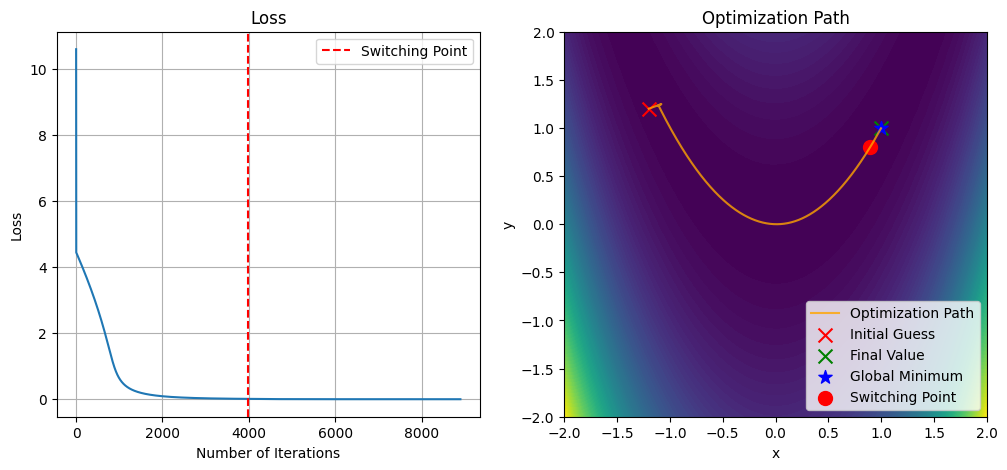

In [15]:
# Plot the convergence of the loss and of the parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(losses)
ax[0].set_title('Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of Iterations')
ax[0].axvline(x=switch_epoch, color='r', linestyle='--', label = 'Switching Point')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x[:, 0], x[:, 1], '-', alpha=0.8, c='orange', label='Optimization Path')
X = np.linspace(-2, 2, 50)
Y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
ax[1].contourf(X, Y, Z, levels=100)
ax[1].scatter(x_0[0], x_0[1], color='r', label='Initial Guess', s=100, marker='x')
ax[1].scatter(x[-1, 0], x[-1, 1], color='g', label='Final Value', s=100, marker='x')
ax[1].scatter(1, 1, color='b', label='Global Minimum', s=100, marker='*')
ax[1].scatter(x[switch_epoch, 0], x[switch_epoch, 1], color='r', label='Switching Point', s=100, marker='o')
ax[1].set_title('Optimization Path')
ax[1].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].legend(loc='lower right')
plt.show()

  0%|          | 0/50000 [00:00<?, ?it/s]

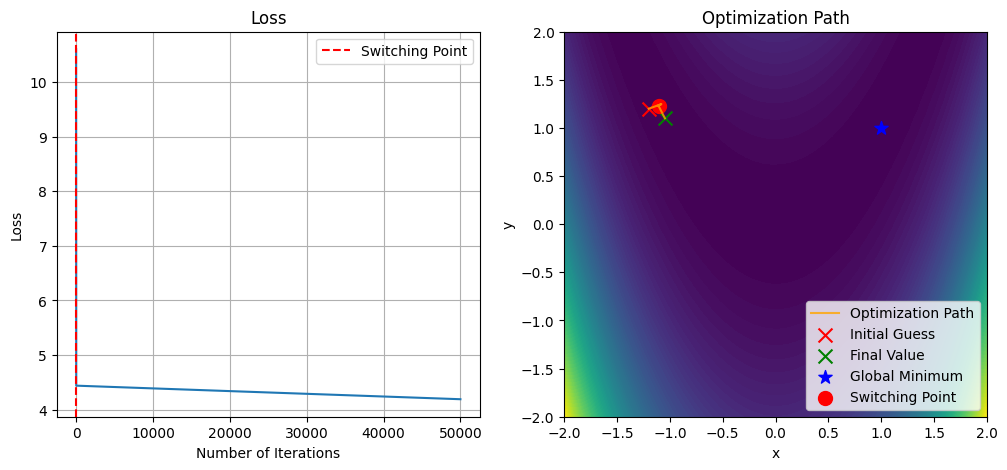

In [16]:
def GD_Newton(f, grad_f, x_0, lr, tol1, tol2, H, n_epochs, seed=0):
	np.random.seed(seed)
	xs = [x_0]
	losses = [f(x_0)]
	switch_point = 0
	H_inv = np.linalg.inv(H)
	for epoch in tqdm(range(n_epochs)):
		x = xs[-1]
		if len(losses)<2 or np.abs(losses[-1] - losses[-2]) > tol1:
			grad = grad_f(x)
			x = x - lr * grad

		else:
			if switch_point == 0:
				switch_point = epoch
			x = x - lr * H_inv @ grad_f(x)
		xs.append(x)
		losses.append(f(x))
		if np.abs(losses[-1] - losses[-2]) < tol2:
			print(f'Converged after {epoch} epochs')
			break
	return np.array(xs), np.array(losses), switch_point


max_iter = 50000 # maximum number of iterations
tol1 = 1e-2 # tolerance for the swithcing criterium
tol2 = 1e-8 # tolerance for the stopping criterium
x_0 = np.array([-1.2,1.2]) # initial guess
stepsize = 0.001 # constant stepsize

func = jax.jit(f) # the expression of the function to be minimized
dfunc = jax.grad(func) # the gradient of the function

x, losses, switch_epoch = GD_Newton(func, dfunc, x_0, stepsize, tol1, tol2, H, max_iter)

# Plot the convergence of the loss and of the parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(losses)
ax[0].set_title('Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of Iterations')
ax[0].axvline(x=switch_epoch, color='r', linestyle='--', label = 'Switching Point')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x[:, 0], x[:, 1], '-', alpha=0.8, c='orange', label='Optimization Path')
X = np.linspace(-2, 2, 50)
Y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
ax[1].contourf(X, Y, Z, levels=100)
ax[1].scatter(x_0[0], x_0[1], color='r', label='Initial Guess', s=100, marker='x')
ax[1].scatter(x[-1, 0], x[-1, 1], color='g', label='Final Value', s=100, marker='x')
ax[1].scatter(1, 1, color='b', label='Global Minimum', s=100, marker='*')
ax[1].scatter(x[switch_epoch, 0], x[switch_epoch, 1], color='r', label='Switching Point', s=100, marker='o')
ax[1].set_title('Optimization Path')
ax[1].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].legend(loc='lower right')
plt.show()

### Comment:

As we can see if we replace the gradient descent direction with the inverse of the Hessian times the gradient, we are not guaranteed to have a descent direction. This is because we are using the hessian of the function in a point that is different from where we actually are. The function is not convex, but in a neighborhood of the solution the hessian will still be positive definite and similar to the hessian in the solution. This is implies that:
- If when we change the direction we are close to the solution, the direction will still be a descent direction, and the algorithm will converge in less iterations. (tolerance = 1e-5 converged in ~3000 epochs less than standard GD)
- If we are far from the solution, the direction will not be a descent direction, and the algorithm will not converge. (tolerance = 1e-2, did not converge in 50000 epochs)


---

# **Exercise 3**

<div style="text-align: center">
<img src="3_text.png" width="80%">
</div>

### Solution:

<div style="text-align: center">
<img src="3_solution.png" width="80%">
</div>